In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [14]:
df = pd.read_csv("dataset/sp.csv") 
df[df.columns[0]].value_counts()[:10]

65    36
62    35
59    32
69    32
73    27
61    27
67    26
63    26
68    26
71    26
Name: math score, dtype: int64

In [5]:
df.isna().sum()

math score    0
dtype: int64

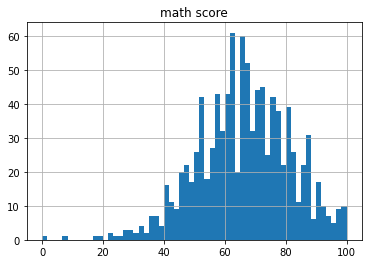

In [22]:
# Plot dist with custom bins 
hist = df.hist(column=['math score'], bins=60)

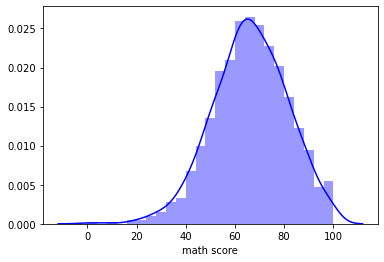

In [25]:
# Plot dist curve
import seaborn as sns 
sns.distplot(df['math score'], color='blue')
plt.show()


In [28]:
# Get Mean and Std 
mean = np.mean(df['math score'])
std = np.std(df['math score'])
mean, std 

(66.089, 15.155496659628149)

In [ ]:
# Get Mean and Std 
mean = np.mean(df['math score'])
mean


### PDF Random Variable distributed Normaly with Mean $\mu$ and Standard Deviation $\sigma ^2$: <br> $X∼ N (μ,σ^2)$

## $f(x) = \frac{1}{{\sigma \sqrt {2\pi } }}e^{ -\frac{(x - \mu)^2}{2\sigma ^2 } }$

In [35]:
# Define the Pdf 
import math

def fx(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) *  np.exp(- np.power((x - mu) / sigma, 2) / 2)


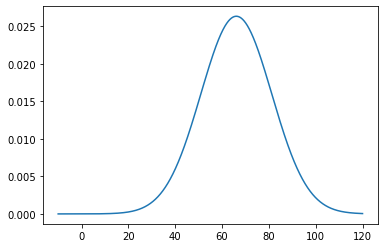

In [36]:
# Cross-check the Pdf
X_p = np.arange(-10, 120, 0.001)
plt.plot(X_p, fx(X_p, mean, std))
plt.show()

### Expectation $E(x)$ defines as:
### $Mean = \mu = E(x) = \frac{\sum_{i=0}^N  (x_i)}{(N)}=\int_{-\infty}^\infty xf(x)dx$


### Standard Deviation $\sigma$ and Variance $\sigma ^2$ can be defined as
### $\sigma = \sqrt{\frac{\sum_{i=0}^N  (x_i-\mu)}{(N-1)}}$
### $Variance = \sigma^2$

In [44]:
from scipy.integrate import quad 

def int(x): 
    return x * fx(x, mean, std)

mean, error = quad(int, float('-inf'), float('inf'))
mean, error 

(66.089, 7.53867703217047e-07)

In [46]:
# Probability of a range [60, 80]
# What is the probability of picking a student having score in [60, 80]
def int_2(x): 
    return fx(x, mean, std)

prob, error = quad(int_2, 60, 80)
prob, error 

(0.47673317811643134, 5.292801509475879e-15)

### Cross-checking the Empirical Rule 68-95-99.7 
![title](empirical.jpg)

In [50]:
from scipy.integrate import quad
 
def int2(x):
    return fx(x,mean,std)
prob1, err = quad(int2, mean-std, mean+std)
prob2, err = quad(int2, mean-2*std, mean+2*std)
prob3, err = quad(int2, mean-3*std, mean+3*std)

prob1*100, prob2*100, prob3*100

(68.2689492137086, 95.4499736103642, 99.73002039367398)

### Standard Normal Distribution
### $X∼ N (0,1)$
## $\Phi(x) = \frac{1}{{ \sqrt {2\pi } }}e^{ -\frac{x^2}{2} }$

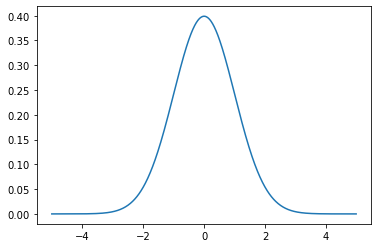

In [56]:
X_p = np.arange(-5, 5, 0.01)
plt.plot(X_p, fx(X_p, 0, 1))
plt.show()